# Attributes Description

* POSTED_BY :	Category marking who has listed the property
* UNDER_CONSTRUCTION :	Under Construction or Not
* RERA :	Rera approved or Not
* BHK_NO :	Number of Rooms
* BHKORRK :	Type of property
* SQUARE_FT :	Total area of the house in square feet
* READYTOMOVE :	Category marking Ready to move or Not
* RESALE :	Category marking Resale or not
* ADDRESS : 	Address of the property
* LONGITUDE :	Longitude of the property
* LATITUDE :	Latitude of the property


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [112]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [113]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


# Data Visualisation

Text(0.5, 1.0, 'Test dataset')

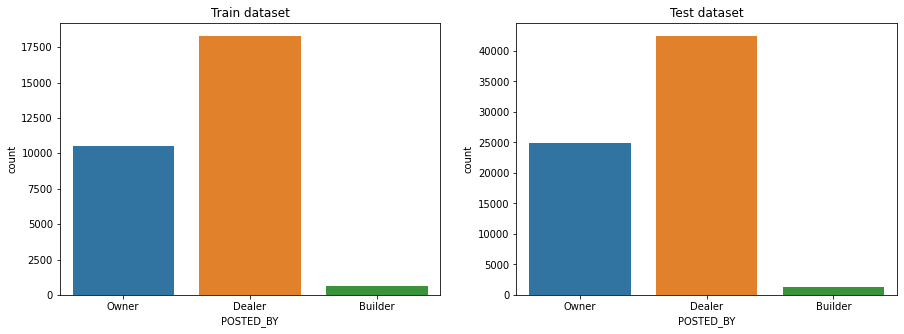

In [114]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='POSTED_BY',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='POSTED_BY',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

Text(0.5, 1.0, 'Test dataset')

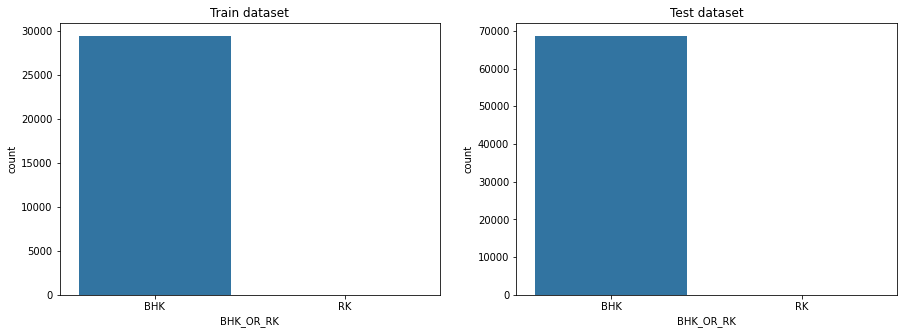

In [115]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='BHK_OR_RK',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='BHK_OR_RK',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

Text(0.5, 1.0, 'Test dataset')

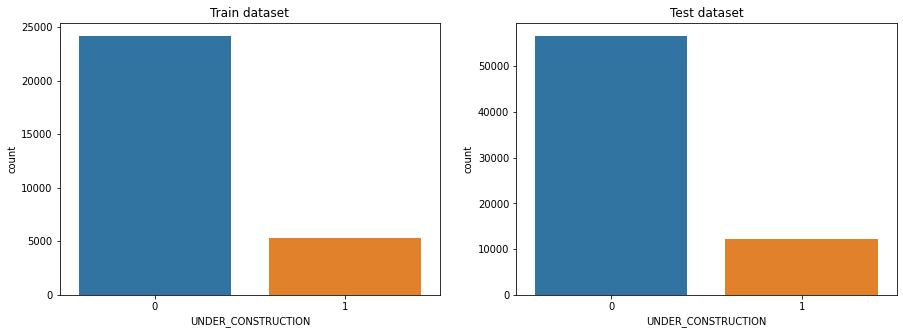

In [116]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='UNDER_CONSTRUCTION',data=train,ax=axes[0])
axes[0].set_title('Train dataset')
sns.countplot(x='UNDER_CONSTRUCTION',data=test,ax=axes[1])
axes[1].set_title('Test dataset')

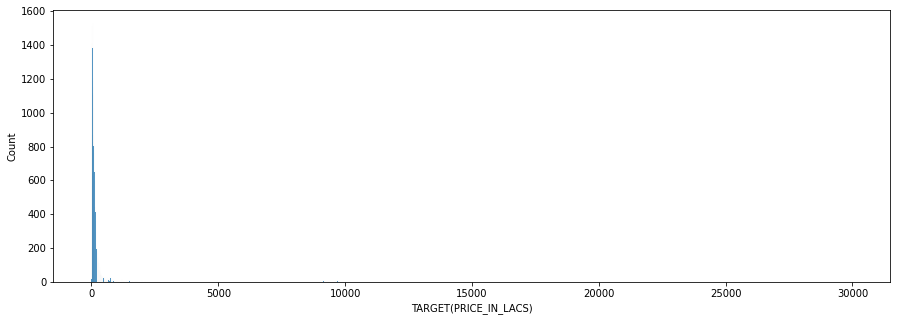

In [117]:
plt.figure(figsize=(15,5))
sns.histplot(x='TARGET(PRICE_IN_LACS)',data=train)

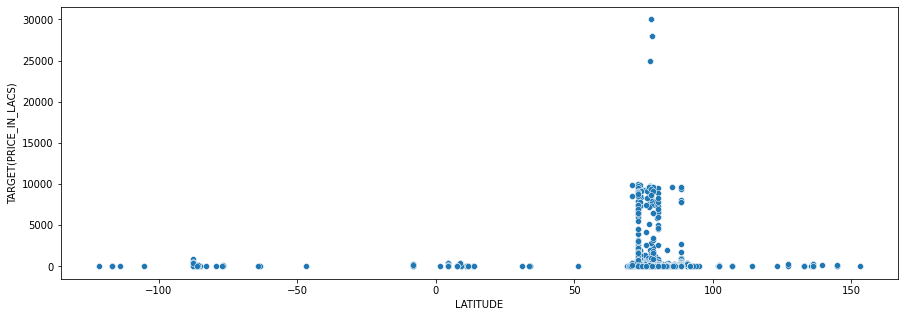

In [118]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='LATITUDE',y='TARGET(PRICE_IN_LACS)')

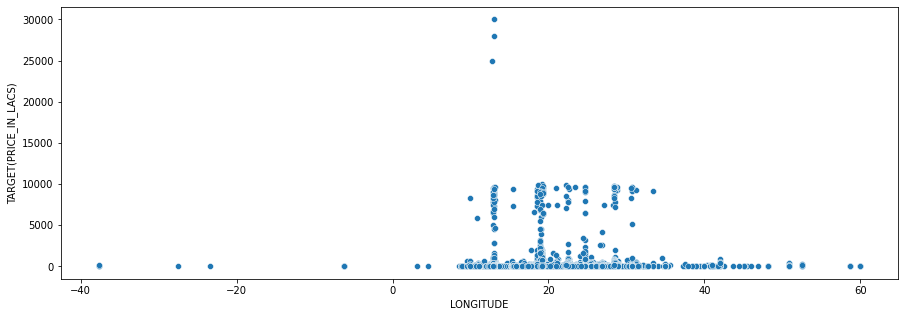

In [119]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='LONGITUDE',y='TARGET(PRICE_IN_LACS)')

# Data Cleaning

In [120]:
train.drop('ADDRESS',axis=1,inplace=True)
test.drop('ADDRESS',axis=1,inplace=True)

In [121]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [122]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [123]:
train = pd.get_dummies(train,columns=['POSTED_BY','BHK_OR_RK'])
test = pd.get_dummies(test,columns=['POSTED_BY','BHK_OR_RK'])

# Model Application

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [125]:
X = train.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = train['TARGET(PRICE_IN_LACS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

In [126]:
linmodel = LinearRegression()

linmodel.fit(X_train,y_train)
pred_lin = linmodel.predict(X_test)
train_pred_lin = linmodel.predict(X_train)

print(r2_score(y_test,pred_lin))
print(mean_squared_error(y_test,pred_lin)**0.5)

0.28671939138113445
560.8059762953637


## Decision Tree Regressor

In [127]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
train_pred_dtree = dtree.predict(X_train)

print(r2_score(y_test,pred_dtree))
print(mean_squared_error(y_test,pred_dtree)**0.5)

0.9206369847741867
187.06455457786495


## Random Forest Regressor

In [128]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
train_pred_rfr = rfr.predict(X_train)

print(r2_score(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr)**0.5)

0.9445390871302498
156.37809967807456


## K Nearest Neighbors Regressor

In [129]:
knn = KNeighborsRegressor()

scalerx = StandardScaler()
scaled_X_train = scalerx.fit_transform(X_train)
scaled_X_test = scalerx.transform(X_test)

knn.fit(scaled_X_train,y_train)
pred_knn = knn.predict(scaled_X_test)
train_pred_knn = knn.predict(scaled_X_train)

print(r2_score(y_test,pred_knn))

0.4196352086630829


In [130]:
scores = []

for i in range(1,16):
    kni = KNeighborsRegressor(n_neighbors=i)
    kni.fit(scaled_X_train,y_train)
    pred_kni = kni.predict(scaled_X_test)
    scores.append(r2_score(y_test,pred_kni))


Text(0, 0.5, 'r2_score')

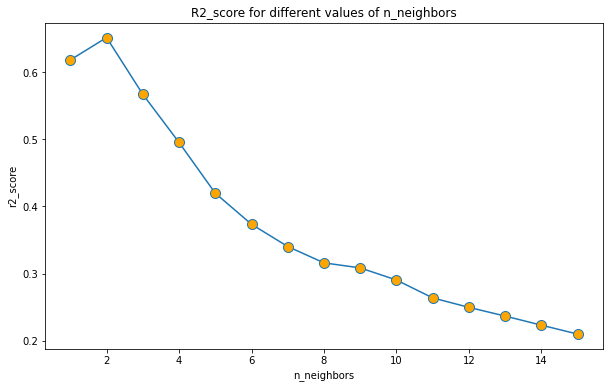

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),scores,markersize=10,marker='o',markerfacecolor='orange')
plt.title('R2_score for different values of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('r2_score')

In [132]:
knr = KNeighborsRegressor(n_neighbors=2)

knr.fit(scaled_X_train,y_train)
pred_knr = knr.predict(scaled_X_test)
train_pred_knr = knr.predict(scaled_X_train)

print(r2_score(y_test,pred_knr))

0.6515055976918396


## Support Vector Machines Regressor

In [133]:
svr = SVR()

scalery = StandardScaler()
scaled_y_train = scalery.fit_transform(y_train.values.reshape(-1,1))
scaled_y_test = scalery.transform(y_test.values.reshape(-1,1))

scaled_y_train = scaled_y_train.reshape(20615,)
scaled_y_test = scaled_y_test.reshape(8836,)

svr.fit(scaled_X_train,scaled_y_train)
pred_svr = svr.predict(scaled_X_test)
train_pred_svr = svr.predict(scaled_X_train)

print(r2_score(scaled_y_test,pred_svr))

0.024218539457167787


In [134]:
param_grid = {'C': [1,10,100], 'gamma': [1,10,100]}

grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=5,cv=3)
grid.fit(scaled_X_train,scaled_y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......................C=1, gamma=1;, score=0.048 total time=   5.1s
[CV 2/3] END ......................C=1, gamma=1;, score=0.028 total time=   5.1s
[CV 3/3] END ......................C=1, gamma=1;, score=0.039 total time=   4.9s
[CV 1/3] END .....................C=1, gamma=10;, score=0.066 total time=   5.8s
[CV 2/3] END .....................C=1, gamma=10;, score=0.041 total time=   5.8s
[CV 3/3] END .....................C=1, gamma=10;, score=0.053 total time=   5.6s
[CV 1/3] END ....................C=1, gamma=100;, score=0.132 total time=   5.0s
[CV 2/3] END ....................C=1, gamma=100;, score=0.094 total time=   5.0s
[CV 3/3] END ....................C=1, gamma=100;, score=0.110 total time=   4.9s
[CV 1/3] END .....................C=10, gamma=1;, score=0.050 total time=   6.4s
[CV 2/3] END .....................C=10, gamma=1;, score=0.052 total time=   6.5s
[CV 3/3] END .....................C=10, gamma=1;,

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 100]}, verbose=5)

In [135]:
grid.best_estimator_

SVR(C=100, gamma=100)

In [136]:
pred_f_svr = grid.predict(scaled_X_test)
train_pred_f_svr = grid.predict(scaled_X_train)

In [137]:
print(r2_score(scaled_y_test,pred_f_svr))

0.5234482955451456


## Neural Networks

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [139]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [140]:
model.fit(scaled_X_train,
          scaled_y_train,
          batch_size=256,
          epochs=500,
          validation_data=(scaled_X_test,scaled_y_test))

Epoch 1/500
81/81 [==============================] - 1s 4ms/step - loss: 1.2804 - val_loss: 1.0104
Epoch 2/500
81/81 [==============================] - 0s 2ms/step - loss: 0.9435 - val_loss: 0.8499
Epoch 3/500
81/81 [==============================] - 0s 3ms/step - loss: 0.8503 - val_loss: 0.7923
Epoch 4/500
81/81 [==============================] - 0s 2ms/step - loss: 0.8172 - val_loss: 0.7665
Epoch 5/500
81/81 [==============================] - 0s 3ms/step - loss: 0.8026 - val_loss: 0.7548
Epoch 6/500
81/81 [==============================] - 0s 3ms/step - loss: 0.7971 - val_loss: 0.7476
Epoch 7/500
81/81 [==============================] - 0s 2ms/step - loss: 0.7932 - val_loss: 0.7439
Epoch 8/500
81/81 [==============================] - 0s 3ms/step - loss: 0.7919 - val_loss: 0.7400
Epoch 9/500
81/81 [==============================] - 0s 2ms/step - loss: 0.7856 - val_loss: 0.7432
Epoch 10/500
81/81 [==============================] - 0s 2ms/step - loss: 0.7844 - val_loss: 0.7414
Epoch 11/

(0.0, 100.0)

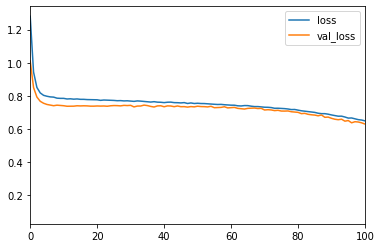

In [141]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.xlim(0,100)

In [142]:
pred_nn = model.predict(scaled_X_test)
train_pred_nn = model.predict(scaled_X_train)

print(r2_score(scaled_y_test,pred_nn))

0.8754599323223312


# Results

In [143]:
lin1 = r2_score(y_test,pred_lin)*100
dtr1 = r2_score(y_test,pred_dtree)*100
rfr1 = r2_score(y_test,pred_rfr)*100
knn1 = r2_score(y_test,pred_knn)*100
knr1 = r2_score(y_test,pred_knr)*100
svr1 = r2_score(scaled_y_test,pred_svr)*100
fsvr1 = r2_score(scaled_y_test,pred_f_svr)*100
nn1 = r2_score(scaled_y_test,pred_nn)*100

lin2 = r2_score(y_train,train_pred_lin)*100
dtr2 = r2_score(y_train,train_pred_dtree)*100
rfr2 = r2_score(y_train,train_pred_rfr)*100
knn2 = r2_score(y_train,train_pred_knn)*100
knr2 = r2_score(y_train,train_pred_knr)*100
svr2 = r2_score(scaled_y_train,train_pred_svr)*100
fsvr2 = r2_score(scaled_y_train,train_pred_f_svr)*100
nn2 = r2_score(scaled_y_train,train_pred_nn)*100

test_score_dict = {'LR':lin1,'DTree':dtr1,'RFC':rfr1,
              'KNR':knn1,'KNR (tuned)':knr1,'SVM':svr1,'SVM (tuned)':fsvr1,'Neural Networks':nn1}
              
train_score_dict = {'LR':lin2,'DTree':dtr2,'RFC':rfr2,
              'KNR':knn2,'KNR (tuned)':knr2,'SVM':svr2,'SVM (tuned)':fsvr2,'Neural Networks':nn2}

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

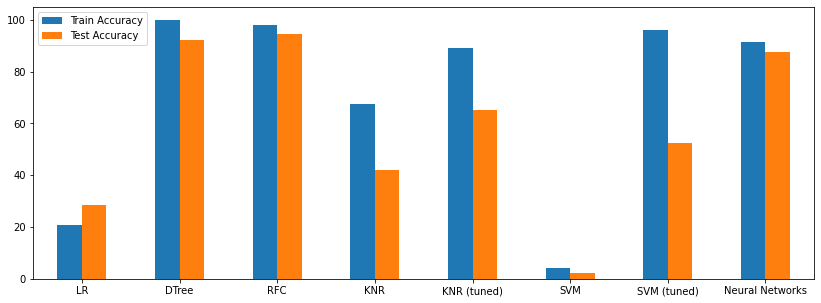

In [144]:
df_scores = pd.DataFrame([train_score_dict,test_score_dict],index=['Train Accuracy','Test Accuracy']).transpose()

df_scores.plot(kind='bar',figsize=(14,5))
plt.xticks(rotation=0)

# Apply Random Forest Regressor model to make predictions

In [145]:
pred_final = rfr.predict(test).round()
predictions = pd.DataFrame(pred_final,columns=['TARGET(PRICE_IN_LACS)'])

## Merging predictions with the test dataframe

In [146]:
test_predict = pd.read_csv('test.csv')

In [147]:
test_predict['TARGET(PRICE_IN_LACS)'] = predictions
test_predict.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,19.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,76.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,67.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,62.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,13.0
